In [1]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

100%|██████████| 50.1k/50.1k [00:00<00:00, 6.67MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1


In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df.head(10)

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


**Identificación y descripcion de las variables**:

In [5]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


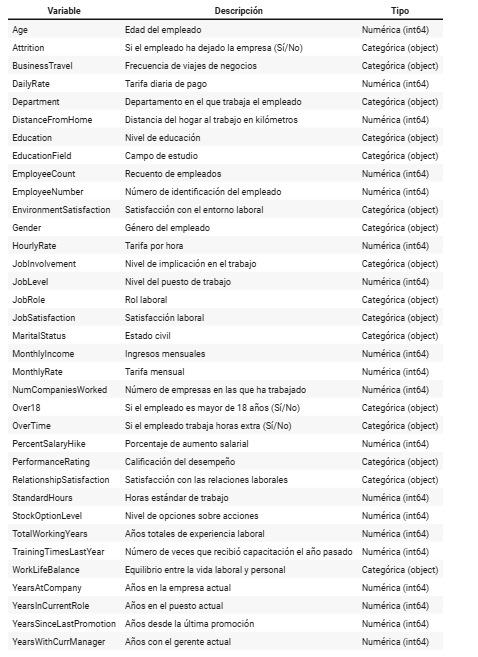

In [13]:
# Estos son algunos calculos sobre medidas de tendencia central y dispersión de datos

# Rango
rango = df['Age'].max() - df['Age'].min()

# Varianza
varianza = df['Age'].var()

# Moda de la edad
moda_edad = df['Age'].mode()

# Media de la edad
media_edad = df['Age'].mean()

# Mediana de la edad
mediana_edad = df['Age'].median()

# Desviación estándar de la edad
desviacion_edad = df['Age'].std()

print("Rango de la edad:", rango)
print("Varianza de la edad:", varianza)
print("Moda de la edad:", moda_edad)
print("Media de la edad:", media_edad)
print("Mediana de la edad:", mediana_edad)
print("Desviación estándar de la edad:", desviacion_edad)

Rango de la edad: 42
Varianza de la edad: 83.45504878602227
Moda de la edad: 0    35
Name: Age, dtype: int64
Media de la edad: 36.923809523809524
Mediana de la edad: 36.0
Desviación estándar de la edad: 9.135373489136734


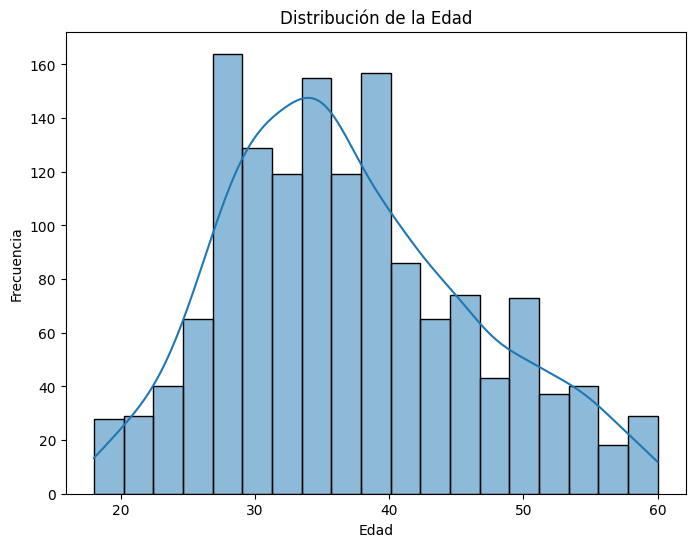

In [15]:
# Histograma de la variable 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)  # kde=True agrega una curva de densidad
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Lo que se ve aqui entre la edad y la frecuencia con la que esta se repite es que incluye un sesgo positivo, es decir, la media es mayor que la media es mayor que la mediana y la mediana es mayor que la moda, con esto y con los resultados de las medidas de tendencia central, podemos deducir que las edades de los trabajadores se repite y circula por encima de los 30 años, con una frecuencia de los 35 años.

El histograna es aproximadamente simetrico

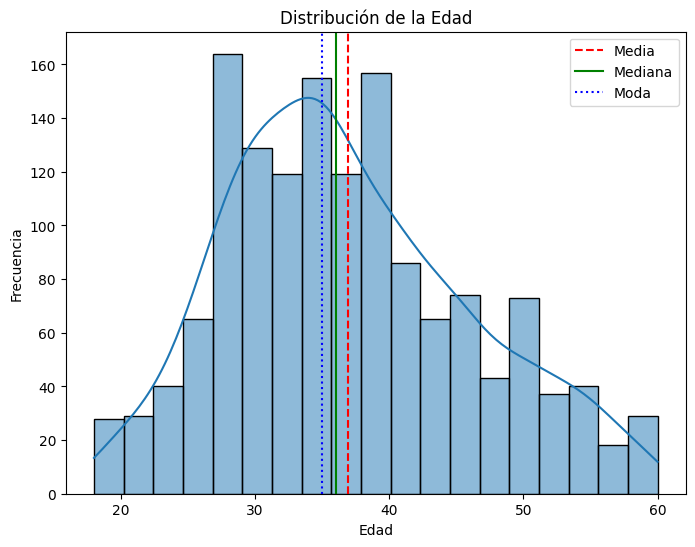

In [18]:
#Sesgo de los datos

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['Age'].median(), color='green', linestyle='-', label='Mediana')
plt.axvline(df['Age'].mode()[0], color='blue', linestyle=':', label='Moda')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El histograma muestra un sesgo positivo ya que la media se encuentra a la derecha de las otras medidas de tendencia central, una interpretación de esto es que la empresa contrata personas jovenes porque esta puede requerir de las mismas habilidades de personal joven y un fuerte de la misma empresa

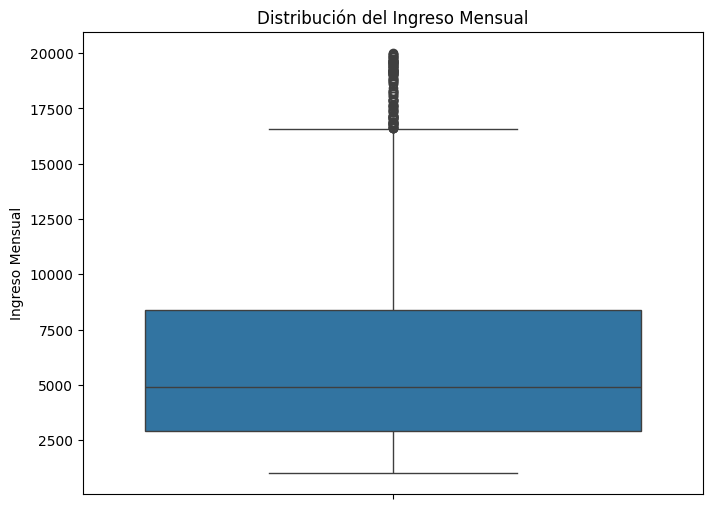

In [19]:
# Gráfico de caja de la variable 'MonthlyIncome'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['MonthlyIncome'])
plt.title('Distribución del Ingreso Mensual')
plt.ylabel('Ingreso Mensual')
plt.show()